# ccClub Class 10: Classifcation with K-Nearest Neighbor
---
**_Author : Alicia Y. Tsai_**

In [1]:
# First thing first. Import packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Part 1: Introduction to k-Nearest Neighbor Algorithm

**[From Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)**

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the $k$ closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

>- In _k-NN classification_, the output is a class membership. An object is classified by a **majority vote** of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


>- In _k-NN regression_, the output is the property value for the object. This value is the **average of the values** of its $k$ nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

[image source](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

<img src="http://atm.amegroups.com/article/viewFile/10170/html/63653" alt="Drawing" style="width: 500px;"/>

[image source](http://atm.amegroups.com/article/viewFile/10170/html/63653)

# k-NN classification

## How to compute majority vote?

To compute the majority vote, we need to come up with a measurement that can tell us how similar two data points are. Therefore, we use **_distance_** between two points to measure their similarity. We can simply use eculidean distance as our measurement. 

So for a unseen observation $x'$ (a new data point), we can compute the distance bewteen one training data point $x$ and the unseen data point $x'$ as followed:

$$
d(x, x') = \sqrt{\sum^n_{i=1} (x_i - x'_i)^2} = \sqrt{(x_1 - x'_1)^2 + (x_2 - x'_2)^2 + ... + (x_n - x'_n)^2}
$$

Then we compute the distances $d$ for all the training data. Once we have the distance, we choose the top $k$ points that have are closet to our unseen $x'$. Next, we calculate the number of each class and that is the **_votes_** for that class. Finally, we then classify our unseen $x'$ to the class with the highest votes.

<img src="https://i.pinimg.com/originals/65/36/b9/6536b9a63fc427e0fc3e1a9687b49aff.png" alt="Drawing" style="width: 500px;"/>

[image source](https://i.pinimg.com/originals/65/36/b9/6536b9a63fc427e0fc3e1a9687b49aff.png)

![](http://en.proft.me/media/science/r_knn_classify.png)

[image source](http://en.proft.me/media/science/r_knn_classify.png)

# Part 2: Build Your k-NN Model on Iris Data

<img src="https://image.slidesharecdn.com/irisdataanalysiswithr-140801203600-phpapp02/95/iris-data-analysis-example-in-r-3-638.jpg?cb=1406925587" alt="Drawing" style="width: 500px;"/>

[image source](https://image.slidesharecdn.com/irisdataanalysiswithr-140801203600-phpapp02/95/iris-data-analysis-example-in-r-3-638.jpg?cb=1406925587)

We will be using the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/Iris), which was introduced in 1936 by the famous statistician Ronald Fisher. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant (Iris setosa, Iris virginica and Iris versicolor). 4 features were used in this data set and fifth feature is the response (target). Our task is to train a k-NN model to classify the species given their 4 features.

>```text
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica
```

<img src="https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png" alt="Drawing" style="width: 200px;"/>

[image source](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png)

## 2-1: Read Iris data with Pandas

In [2]:
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# read in data and assign column names

### YOUR CODE HERE ###
data = pd.read_csv('iris.csv', header=None)
data = data.iloc[:, 1:]
data.columns = names
######################

## Inspect data

In [3]:
print(data.shape[0], 'rows (instances) X', data.shape[1], 'columns (features)')

display(data.head())

150 rows (instances) X 5 columns (features)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect targets (how many species)

In [4]:
# get unique classes in the dataset

### YOUR CODE HERE ###
classes = data['class'].unique()
######################

print('There are', len(classes), 'classes in the dataset:', ', '.join(list(classes)))

There are 3 classes in the dataset: Iris-setosa, Iris-versicolor, Iris-virginica


## 2-2: Plot the data

### `sepal_length`  VS  `sepal_width`

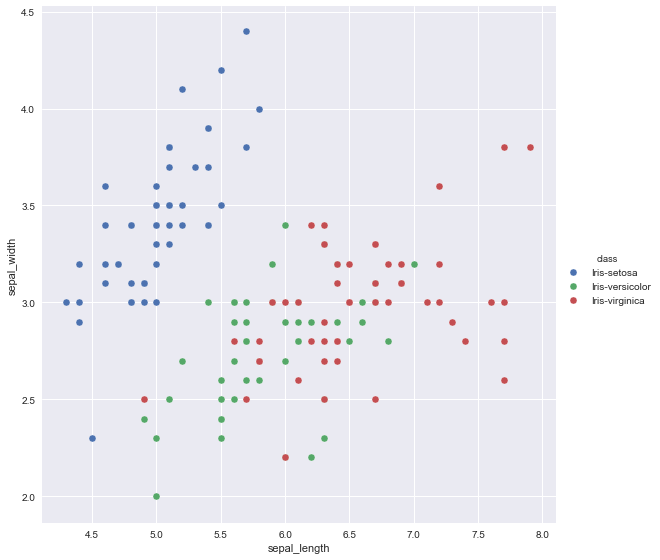

In [5]:
sns.pairplot(x_vars=["sepal_length"], y_vars=["sepal_width"], data=data, hue="class", size=8)

### `petal_length`  VS  `petal_width`

In [7]:
sns.pairplot(x_va rs=["petal_length"], y_vars=["petal_width"], data=data, hue="class", size=8)

SyntaxError: invalid syntax (<ipython-input-7-2a642ab11450>, line 1)

## 2-3: Split data into training & testing set

- To test the performance of the model, we will need to get testing set.
- One convention is to split the data into 3 sets: training, development and testing.
    - In this convention, we use development set to test the accuracy of the model.
    - And use real-world data as the testing set to measure the final performance.
- Another convention is to split the data into 2 sets: training and testing.
    - In this convention, the testing set here is equivalent to the development set.

### Here we will use the second convention. To split the data into train and test set, we do the 3 following steps.

- STEP 1: Create a boolean mask to selects our training set.
    - `HINT: use np.random.rand()` to get a probability.
    - This probability is the fraction of data that we want for our training set.


- STEP 2: Use the mask as your filter to select your training set.


- STEP 3: Last, deselect the indexes to get the testing set. 
    - `HINT: use DataFrame[~boolean]`

In [8]:
# to make sure that the random number is always the same (only for checking purpose)
np.random.seed(1)

### YOUR CODE HERE ###
# create a mask to filter training data
mask = np.random.rand(len(data)) < 0.7

# select training data
data_train = data[mask]

# select testing data
data_test = data[~mask]
#######################


print('There are', len(data_train), 'data in your training set.')
print('There are', len(data_test), 'data in your testing set.')

There are 107 data in your training set.
There are 43 data in your testing set.


## Select Input data and output target

- The input data should be the first 4 columns of the data.
    - The shape of your input data should be `(number of data, 4)`.


- The output target should be the last column.
    - Here, we store our output target in a 1D array (ranked 1).
    - The shape of your output target should be `(number of data, )`.


- Convert your DataFrame into a numpy array (matrix).

In [9]:
### YOUR CODE HERE ###
X_train = np.array(data_train.iloc[:, :4])
y_train = np.array(data_train.iloc[:, 4])

X_test = np.array(data_test.iloc[:, :4])
y_test = np.array(data_test.iloc[:, 4])
#######################

print('Input data for training:', X_train.shape)
print('Output target for training:', y_train.shape)

print('Input data for testing:', X_test.shape)
print('Output target for testing:', y_test.shape)

Input data for training: (107, 4)
Output target for training: (107,)
Input data for testing: (43, 4)
Output target for testing: (43,)


In [10]:
# Test cell: to make sure the shape of your data is correct

assert X_train.shape == (len(data_train), 4)
assert y_train.shape == (len(data_train), )
assert X_test.shape == (len(data_test), 4)
assert y_test.shape == (len(data_test), )

## 2-4: Build your k-nearest neighbor model from scratch

**_Let the fun part begin!_**

There are 2 main parts for the k nearest neighbor algorithm. The first part is to compute all the distances between the testing data point and the training data points. The second part is to get the prediction based on its $k$ nearest neighbors.

**PART A: COMPUTE DISTANCE**
    - STEP 1: loop over all the points in training data
    - STEP 2: select one data point in the training set, which will be our current `x_train`
    - STEP 3: compute the distance between the testing point `x_test` and `x_train`
              - Hint: use the eculidean distance, see the equation above
    - STEP 4: store the computed distance  

**PART B: GET PREDICTION**
    - STEP 1: get the original indexes of the sorted distances.
              - Hint: we use numpy's `argsort` funtion to implement this
              - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argsort.html
              
    - STEP 2: get targets based on the sorted distances (increasing order)
    - STEP 3: get top k's targets
    - STEP 4: compute votes for each species and find the majority vote
    - STEP 5: output prediction
              - Hint: we use numpy's `argmax` function to get the index of the maximum vlaue
              - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmax.html

In [13]:
def KNN(X_train, y_train, x_test, k):
    
    # lists to store distance and target
    distances = []
    targets = []

    # ===== COMPUTE DISTANCE ===== #
    ### YOUR CODE HERE ###  
    # STEP 1: loop over all points in training data
    for i in range(len(X_train)):
        
        # --- compute distance between testing data 'x_test' and each data point 'x_train' in training data
        # STEP 2: select current data point 'x_train'
        x_train = X_train[i, :]
        # STEP 3: compute euclidean distance (see Hints you are stuck!)
        diff = x_train - x_test 
        square = diff**2
        total_sum = np.sum(square)
        dist = np.sqrt(total_sum)
        
        #dist = np.sqrt(np.sum((x_train - x_test)**2))
        # STEP 4: store distance in the 'distances' list
        distances.append(dist)  
    #######################
 

    # ===== GET PREDICTION ===== #   
    # STEP 1: get the indexes of the sorted distances (in increasing order)
    # convert list to numpy array to use 'argsort' function    
    indexes = np.array(distances).argsort()
    
    ### YOUR CODE HERE ###
    # STEP 2: get targets based on sorted distances' indexes    
    targets = y_train[indexes]
    
    # STEP 3: get the first k's targets (k-neareast neighbor)
    k_targets = targets[:k]
    
    # STEP 4: compute votes 
    # for each species in the classes, compute its votes and store the value in the 'votes' list
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    votes = []
    for c in classes:
        votes.append(np.sum(k_targets == c)) 
    ########################
    
    # STEP 5: get prediction
    # get the index of the majority vote, convert list to numpy array to use 'argmax' function
    max_index = np.array(votes).argmax()
    
    # get the final prediction that has the most votes
    predict = classes[max_index]
    
    return predict

## 2-5: Let's test our model

**_Woo-hoo! You've made it. Now let's run your model on the testing data._**

### Test on one testing data point

In [15]:
# change the setting to play around with your model
k = 5
x_test = X_test[5,:]

# get prediction using your KNN model
predict = KNN(X_train, y_train, x_test, k)
print('The prediced class for x_test:', predict)

The prediced class for x_test: Iris-setosa


### Test on all testing data points

To test on all the testing data, we need to **loop through** all the testing data point and make prediction for each of them.

> Write a function `model` that takes in `X_train`, `y_train`, `X_test`, `y_test` and `k` and calculates the accuracy for the testing data.

>```text 
- STEP 1: loop over all the data points
- STEP 2: select on testing data point, which will be our current `x_test`
- STEP 3: get prediction for that data point using your KNN function 
          - Hint: see the above code cell if you don't know how to use your function
- STEP 4: store the prediction
- STEP 5: compute accuracy
```

In [16]:
def model(X_train, y_train, X_test, y_test, k):
    
    # a list to store all the prediction results
    predictions = []
    
    ### YOUR CODE HERE ###
    # STEP 1: loop through all the data point in your testing data 'X_test'
    for i in range(len(X_test)):
        # STEP 2: get current data point `x_test`
        x_test = X_test[i, :]
        # STEP 3: make prediction for x_test
        predict = KNN(X_train, y_train, x_test, k)
        # STEP 4: store the prediction result in the 'predictions' list
        predictions.append(predict)
    #######################
    
    # STEP 5: compute accuracy (number of matches divided by total number of data)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    
    return accuracy

In [19]:
# change the setting to play around with your model
k = 5

# get prediction using your `model` function
accuracy = model(X_train, y_train, X_test, y_test, k)
print('Your KNN model has', str(round(accuracy*100,2)), 'accuracy!')

Your KNN model has 95.35 accuracy!


### Test on various value of K

Now that you've built the `KNN` and the `model` function, you can change the value of $k$ to see how different number of $k$ influence the prediction and accuracy. Observe that our model seems to do a pretty good job using only a small number of $k$. As $k$ gets large the accuracy also gets worse.

In [20]:
ks = []
for i in range(1, 100):
    ks.append(i)

Ks = [i for i in range(1, 100)]   # be careful that k should not exceed the number of training data

test_accuracy = []

for k in Ks:
    accuracy = model(X_train, y_train, X_test, y_test, k)
    test_accuracy.append(accuracy)

### Visualize the results

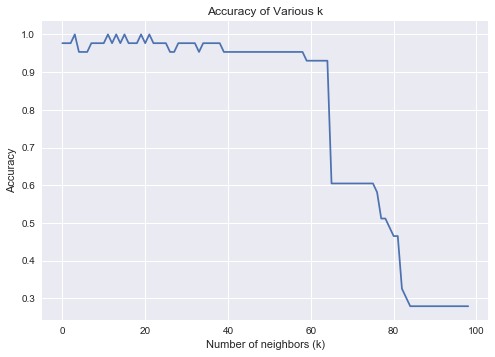

In [21]:
# plot the testing accuracy with respect to different k

plt.plot(test_accuracy)
plt.title('Accuracy of Various k')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')